<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/1_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data preparation

First of all we need to import several libraries which will help us to work with table of data that we were given and some libraries will make visualisations. 

In [0]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             
plt.style.use('ggplot')     

%matplotlib inline

Read data from the initial .csv file and put it in a DataFrame 

In [0]:
df = pd.read_csv('исходник0.csv',delimiter=';', encoding= 'cp1251')

Lets have a look what our table inclues and what columns of which type is inside.

In [0]:
df.head()


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 38 columns):
Дата                        691539 non-null object
ДатаДоставки                690913 non-null object
НомерЗаказаНаСайте          691535 non-null object
НовыйСтатус                 691539 non-null object
СуммаЗаказаНаСайте          691539 non-null object
СуммаДокумента              691539 non-null object
МетодДоставки               691539 non-null object
ФормаОплаты                 691539 non-null object
Регион                      686397 non-null object
Группа2                     616853 non-null object
Группа3                     616853 non-null object
Группа4                     585914 non-null object
Тип                         691539 non-null object
Номенклатура                691539 non-null object
ТипТовара                   616849 non-null object
Отменено                    691539 non-null object
ПричинаОтмены               66703 non-null object
Количество             

In [0]:
df.shape

(691539, 38)

Now lets drop duplicates if there are any

In [0]:
df.drop_duplicates()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3 240,3 240,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,1,17.04.2017 0:00,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1 377,1 377,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


In [0]:
df.shape

(691539, 38)

The number of rows hasn't changed, so there were no dublicates. Now lets have a look on empty values. We will visualise it. On the picture below we can see 38 strips for each column. The purpule color shows non-empty cells and yellow - empty. Columns "ПричинаОтмены", "ПВЗ_код" and "МагазинЗаказа" are almost fully empty. So, we will drop this columns

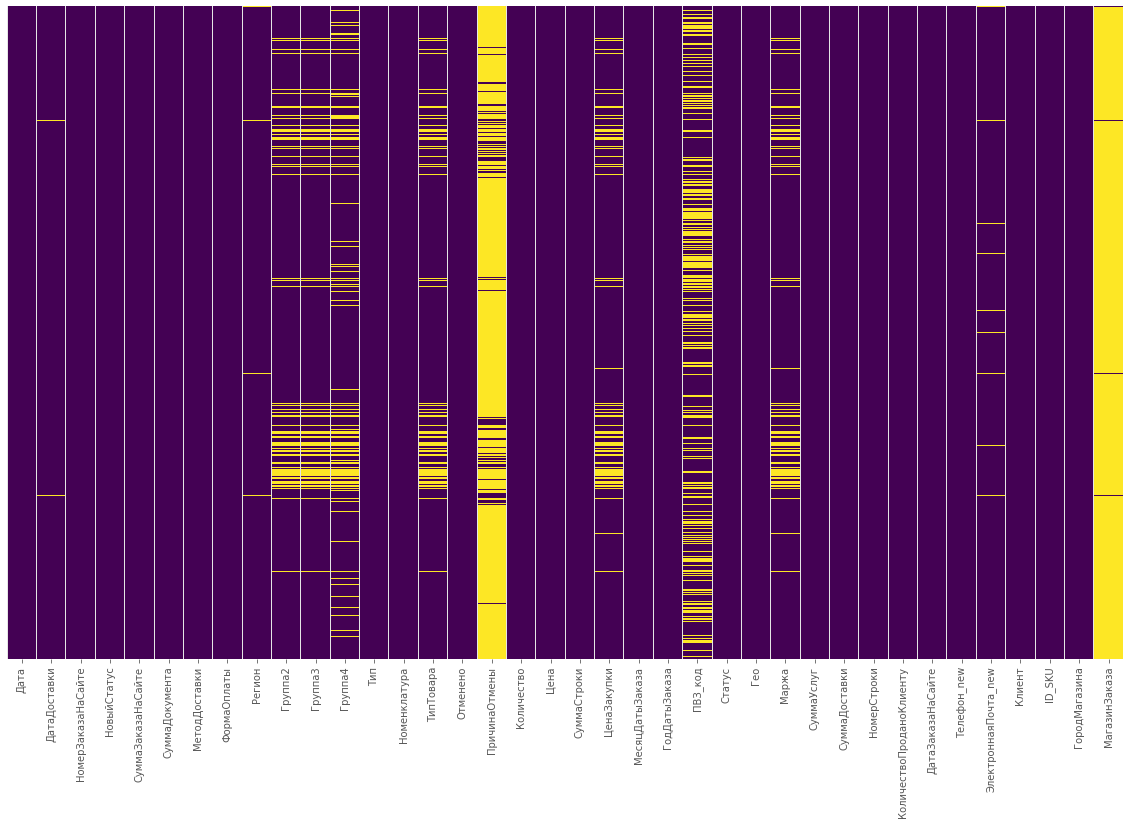

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
df.drop(['ПричинаОтмены', 'МагазинЗаказа', 'ПВЗ_код'], axis='columns', inplace=True)

In [0]:
df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0


As we can see there are also many rows that are missing many important values. So, we will also drop rows with more than 6 empty parameters.

In [0]:
df = df.dropna(axis = 0, thresh = 30)

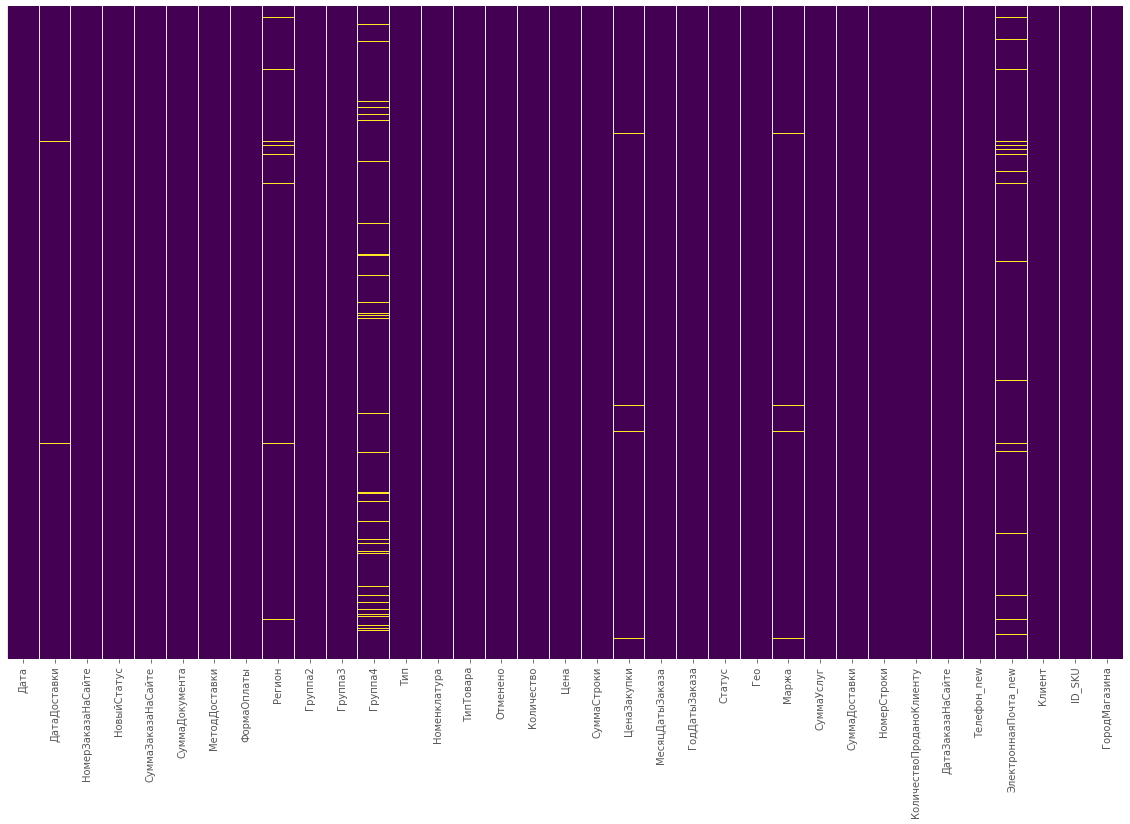

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now there are not so many empty cells in our DataFrame.

Next step is to check whether the type of data in each column corresponds its type logicaly

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616849 entries, 0 to 691538
Data columns (total 35 columns):
Дата                        616849 non-null object
ДатаДоставки                616230 non-null object
НомерЗаказаНаСайте          616849 non-null object
НовыйСтатус                 616849 non-null object
СуммаЗаказаНаСайте          616849 non-null object
СуммаДокумента              616849 non-null object
МетодДоставки               616849 non-null object
ФормаОплаты                 616849 non-null object
Регион                      611798 non-null object
Группа2                     616849 non-null object
Группа3                     616849 non-null object
Группа4                     585910 non-null object
Тип                         616849 non-null object
Номенклатура                616849 non-null object
ТипТовара                   616849 non-null object
Отменено                    616849 non-null object
Количество                  616849 non-null int64
Цена                   

As we can see most of columns have type 'object'. This type does not suits columns with numeric values. The reason for it is that in intiatial file thousandths are separated with other digits of numbers by spaces. In addition to this, decimal part of numbers is separates with commas. We need to delite spases and replace commas with points. After this actions we can change the type of the columns and get float64 type.

In [0]:
numeric_columns = ['СуммаЗаказаНаСайте', 'Цена', 'Маржа', 'СуммаУслуг', 'СуммаСтроки']

In [0]:
for column in numeric_columns:
    df[column] = df[column].replace(r'\s+','',regex=True)
    df[column] = df[column].replace(',','.',regex=True)
    df[column] = df[column].apply(pd.to_numeric)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616849 entries, 0 to 691538
Data columns (total 35 columns):
Дата                        616849 non-null object
ДатаДоставки                616230 non-null object
НомерЗаказаНаСайте          616849 non-null object
НовыйСтатус                 616849 non-null object
СуммаЗаказаНаСайте          616849 non-null int64
СуммаДокумента              616849 non-null object
МетодДоставки               616849 non-null object
ФормаОплаты                 616849 non-null object
Регион                      611798 non-null object
Группа2                     616849 non-null object
Группа3                     616849 non-null object
Группа4                     585910 non-null object
Тип                         616849 non-null object
Номенклатура                616849 non-null object
ТипТовара                   616849 non-null object
Отменено                    616849 non-null object
Количество                  616849 non-null int64
Цена                    

Now, we will save this DataFrame in a new csv file and will work with this new file

In [0]:
df = df[(df['НовыйСтатус'] == 'Доставлен') & (df['Отменено'] == 'Нет') & (df['Количество'] > 0) & (df['Телефон_new'] != '0')]
df.rename(columns={'СуммаСтроки': 'Revenue', 'Маржа': 'Marge'}, inplace=True)

In [0]:
df.shape

(217581, 35)

In [0]:
df['Revenue'].sum()

236885210.42000002

In [0]:
df.to_csv('clean_data_final01.csv')

In [0]:
df.rename(columns={'СуммаСтроки': 'Revenue', 'Маржа': 'Marge', }, inplace=True)
df_by_bills = df[['НомерЗаказаНаСайте', 'Revenue', 'Marge', 'Количество']].groupby('НомерЗаказаНаСайте').aggregate(sum)
df_by_bills = df_by_bills.fillna(0)

In [0]:
df_data = df[['Дата','НомерЗаказаНаСайте']].drop_duplicates()

In [0]:
df_by_bills = df_by_bills.merge(df_data, how='right', on='НомерЗаказаНаСайте')
df_by_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06
...,...,...,...,...,...
75627,4513463_TR,1932.0,429.28,4,30.04.2017 23:48
75628,4513474_TR,2002.0,558.57,10,30.04.2017 23:53
75629,4513480_TR,4864.0,910.86,2,30.04.2017 23:58
75630,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58


In [0]:
date = [] 
hours = []
weekdays = []
for item in df_by_bills['Дата']:
    
    x =  pd.to_datetime(item, format="%d.%m.%Y %H:%M")
    a = x.timetuple()
    hours.append(a[3])
    weekdays.append(a[6])
    date.append(x.replace(minute=0, hour =0))
    

df_by_bills['Date'] = date
df_by_bills['Hours'] = hours
df_by_bills['Weekday'] = weekdays

In [0]:
df_by_bills

,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday
0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5
1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3
2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5
3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3
4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4
...,...,...,...,...,...,...,...,...
75627,4513463_TR,1932.0,429.28,4,30.04.2017 23:48,2017-04-30,23,6
75628,4513474_TR,2002.0,558.57,10,30.04.2017 23:53,2017-04-30,23,6
75629,4513480_TR,4864.0,910.86,2,30.04.2017 23:58,2017-04-30,23,6
75630,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58,2017-04-30,23,6


In [0]:
df_by_bills.to_csv('clean_data_drouped_by_bills.csv')